In [119]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# **Q1: Exploratory Data Analysis**

In [120]:
#Importing dataset from google drive
titanic_df = pd.read_csv('titanic_dataset.csv')

In [121]:
# Display the first few rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
# Summary statistics
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [123]:
#Information on Datatypes
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Univariate Analysis**

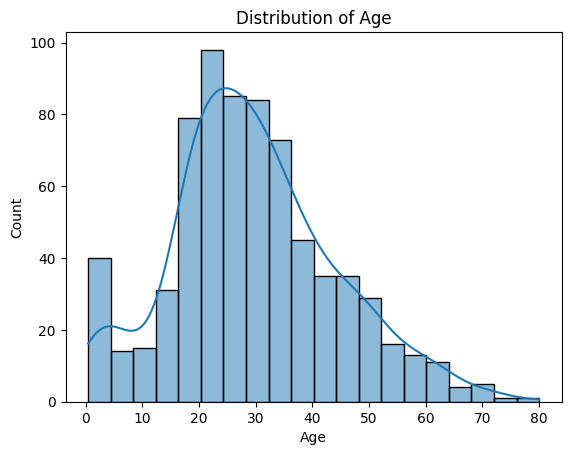

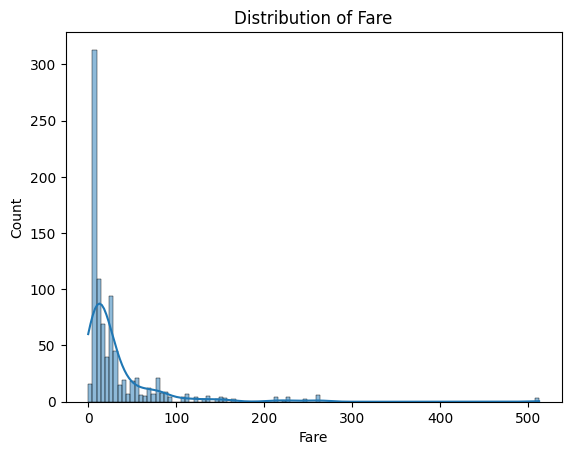

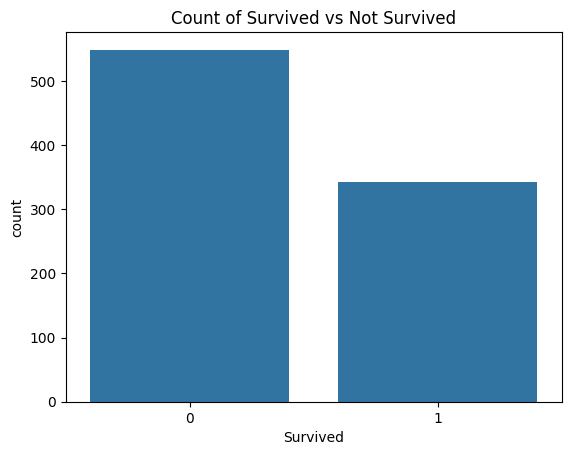

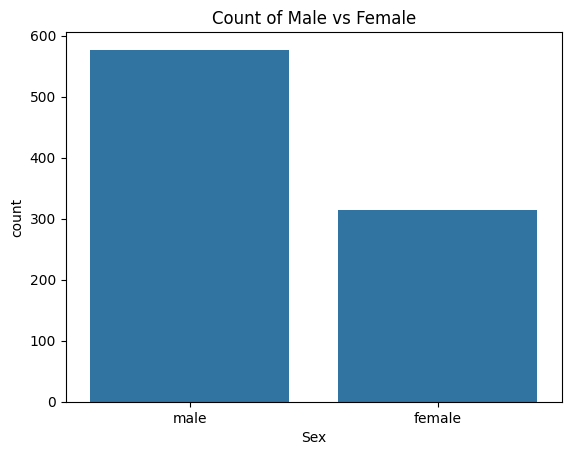

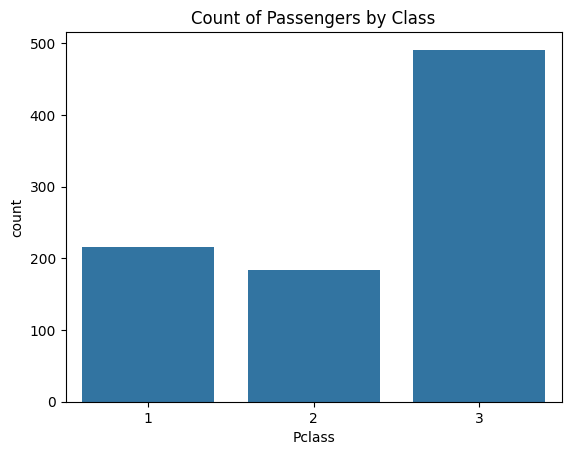

In [124]:
#For numerical variables
sns.histplot(titanic_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

#For categorical variables
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count of Survived vs Not Survived')
plt.show()

sns.countplot(x='Sex', data=titanic_df)
plt.title('Count of Male vs Female')
plt.show()

sns.countplot(x='Pclass', data=titanic_df)
plt.title('Count of Passengers by Class')
plt.show()


**Bivariate Analysis**

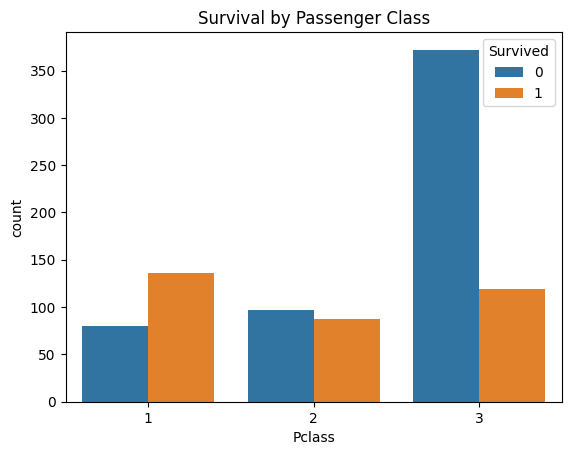

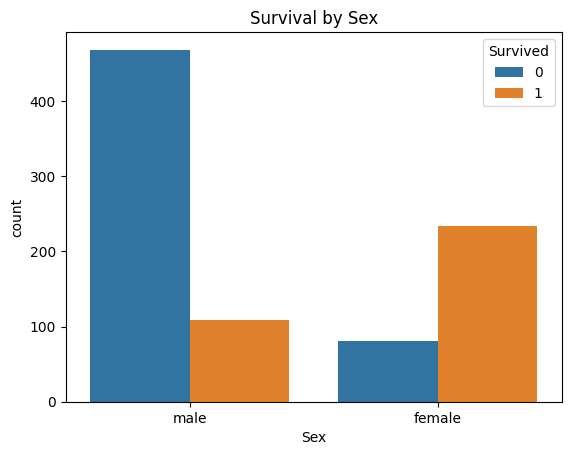

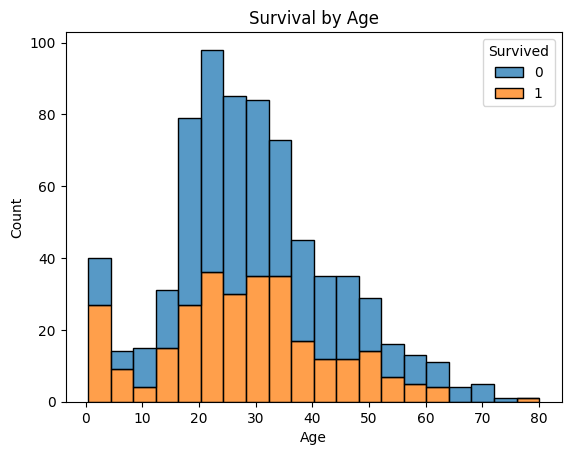

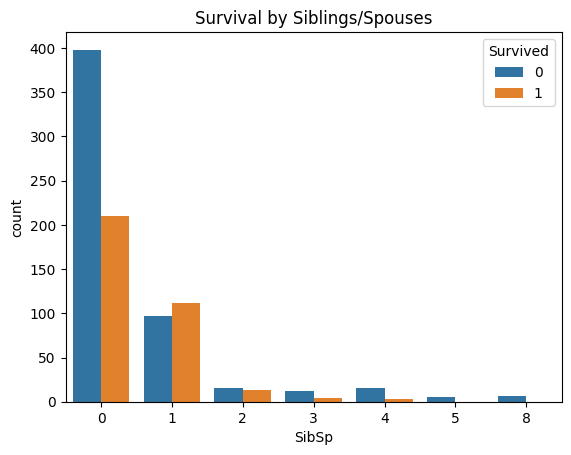

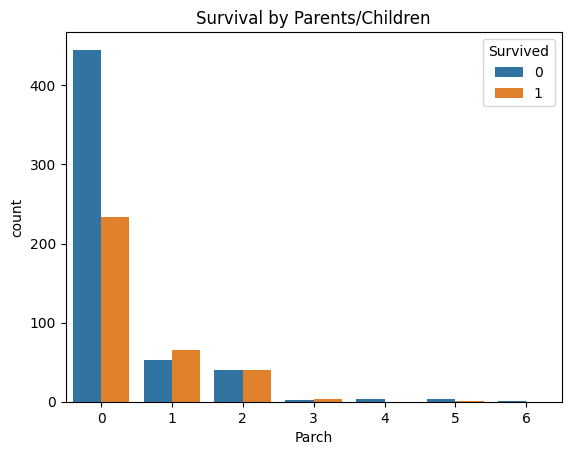

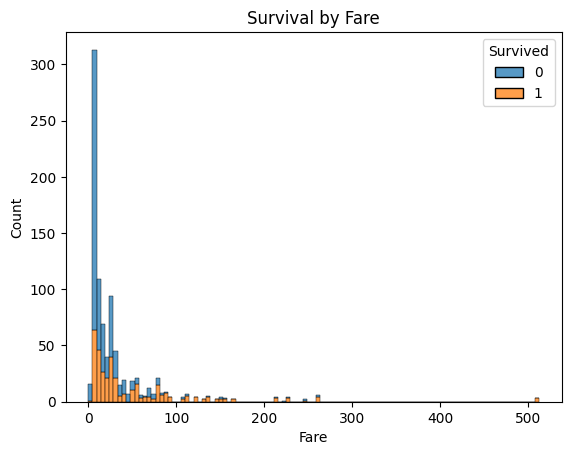

In [125]:
# Survived vs. Passenger Class
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# Survived vs. Sex
sns.countplot(data=titanic_df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

# Survived vs. Age
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack')
plt.title('Survival by Age')
plt.show()

# Survived vs. SibSp
sns.countplot(data=titanic_df, x='SibSp', hue='Survived')
plt.title('Survival by Siblings/Spouses')
plt.show()

# Survived vs. Parch
sns.countplot(data=titanic_df, x='Parch', hue='Survived')
plt.title('Survival by Parents/Children')
plt.show()

# Survived vs. Fare
sns.histplot(data=titanic_df, x='Fare', hue='Survived', multiple='stack')
plt.title('Survival by Fare')
plt.show()


In [126]:
#Checking for missing values
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Q2: Data Preprocessing**

In [127]:
#Fill in missing values for age using median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

#Fill in missing values for embarked using mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Dropping the column 'Cabin'
titanic_df.drop('Cabin', axis=1, inplace=True)

<ipython-input-127-995023b69348>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
<ipython-input-127-995023b69348>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [128]:
#Rechecking for the missing values
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [129]:
#Encoding 'Embarked' and 'Sex' column using One_hot encoder

#Creating an instance of OneHotEncoder
embarked_encoder = OneHotEncoder()
embarked_encoded = embarked_encoder.fit_transform(titanic_df[['Embarked']])

In [130]:
#Encoding 'Sex' column specifically '0' for male and '1' for female
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

In [131]:
#Creating a new feature 'FamilySize'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

In [132]:
# Extracting unique categories for 'Embarked' feature
categories = embarked_encoder.categories_[0]

# Generate feature names for 'Embarked' based on unique categories
embarked_feature_names = [f'Embarked_{category}' for category in categories]
embarked_df = pd.DataFrame(embarked_encoded.toarray(), columns=embarked_feature_names)
titanic_df = pd.concat([titanic_df, embarked_df], axis=1)
titanic_df.drop('Embarked', axis=1, inplace=True)

In [133]:
# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the features
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])

In [134]:
#Dropping unrequired columns from the dataset
titanic_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
correlation_matrix = titanic_df.corr()

In [135]:
#Dropping irrelevant columns for clustering
X = titanic_df.drop(columns=['Survived', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Embarked_Q', 'Embarked_S', 'Embarked_C'])

# **Q3: Model Development and Evaluation**

In [136]:
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

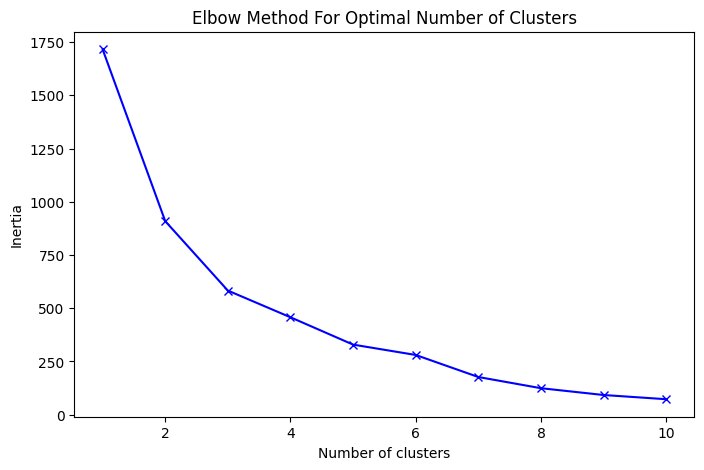

In [137]:
# Plot the elbow graph to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [138]:
# Based on the elbow method, we assume the optimal number of clusters is 3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [139]:
# Add the cluster labels to the dataset
titanic_df['Cluster'] = kmeans.labels_

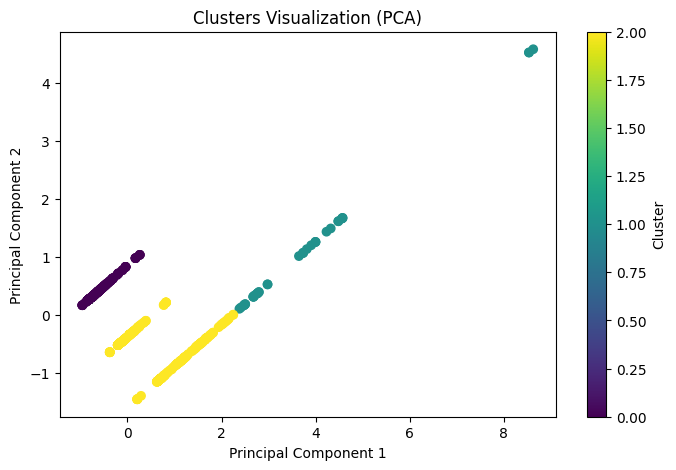

In [140]:
# Reduce the dimensions of the data to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=titanic_df['Cluster'], cmap='viridis', label='Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization (PCA)')
plt.colorbar(label='Cluster')
plt.show()

In [141]:
# Calculate evaluation metrics
silhouette_avg = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)

In [142]:
# Store evaluation metrics in a dictionary for the test set
evaluation_metrics_test = {
    'Silhouette Score': silhouette_avg,
    'Davies-Bouldin Index': davies_bouldin,
    'Calinski-Harabasz Index': calinski_harabasz
}

# Print evaluation metrics for the test set
print("Evaluation Metrics for KMeans Clustering on Test Set:")
print(evaluation_metrics_test)

Evaluation Metrics for KMeans Clustering on Test Set:
{'Silhouette Score': 0.5233050392601417, 'Davies-Bouldin Index': 0.7845099570324915, 'Calinski-Harabasz Index': 863.5056551367265}
